In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies        = pd.read_csv('/content/drive/MyDrive/KU Module/Project Dissertation/Project_Model/movies.csv')
links         = pd.read_csv('/content/drive/MyDrive/KU Module/Project Dissertation/Project_Model/links.csv')
ratings       = pd.read_csv('/content/drive/MyDrive/KU Module/Project Dissertation/Project_Model/ratings.csv')
tags          = pd.read_csv('/content/drive/MyDrive/KU Module/Project Dissertation/Project_Model/tags.csv')

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [ ]:
links.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,8


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings['userId'].nunique()

610

In [ ]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
combined_df = pd.merge(ratings, movies, on='movieId')

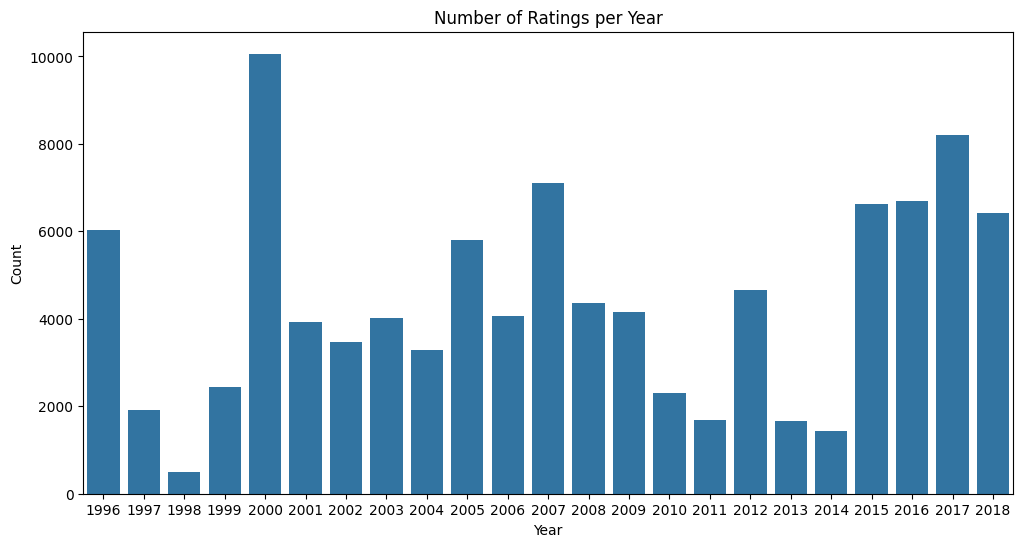

In [ ]:
# Convert timestamp to datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], unit='s')

# Extract year and month
combined_df['year'] = combined_df['timestamp'].dt.year
combined_df['month'] = combined_df['timestamp'].dt.month

# Plot ratings by year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=combined_df)
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [ ]:
combined_df.head(50)

,userId,movieId,rating,timestamp,title,genres,year,month
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000,7
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1996,11
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2005,1
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2017,11
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2011,5
5,18,1,3.5,2016-02-11 16:56:56,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2016,2
6,19,1,4.0,2000-08-08 03:33:57,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000,8
7,21,1,3.5,2014-08-09 21:14:38,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2014,8
8,27,1,3.0,2000-07-04 04:34:22,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000,7
9,31,1,5.0,1996-12-13 08:43:36,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1996,12


In [ ]:
combined_df['day_of_week'] = combined_df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6

In [ ]:
combined_df['userId'].nunique()

610

In [ ]:
combined_df

,userId,movieId,rating,timestamp,title,genres,year,month,day_of_week
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000,7,6
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1996,11,4
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2005,1,1
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2017,11,0
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2011,5,2
...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,Bloodmoon (1997),Action|Thriller,2016,11,5
100832,610,160527,4.5,2016-11-19 08:43:18,Sympathy for the Underdog (1971),Action|Crime|Drama,2016,11,5
100833,610,160836,3.0,2017-05-03 20:53:14,Hazard (2005),Action|Drama|Thriller,2017,5,2
100834,610,163937,3.5,2017-05-03 21:59:49,Blair Witch (2016),Horror|Thriller,2017,5,2


In [ ]:
# Compute correlations
correlations = combined_df[['rating', 'day_of_week', 'month']].corr()

# Extract correlations with ratings
rating_correlations = correlations['rating'].drop('rating')

print(rating_correlations)

day_of_week    0.007509
month          0.035597
Name: rating, dtype: float64


<ipython-input-40-4ace75bf40c2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Correlation', data=correlation_df, palette='coolwarm')


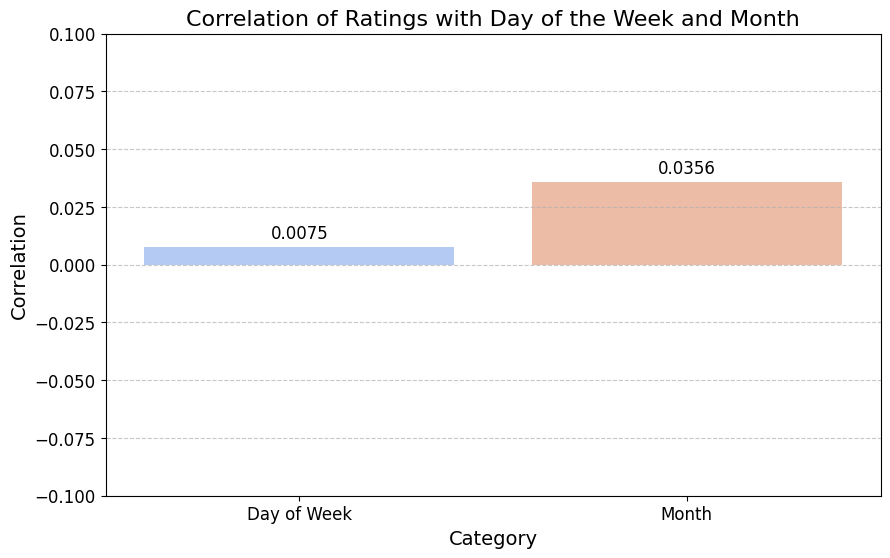

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for correlation
data = {
    'Category': ['Day of Week', 'Month'],
    'Correlation': [0.007509, 0.035597]
}

# Create DataFrame
correlation_df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Correlation', data=correlation_df, palette='coolwarm')

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=12, color='black')

# Customize plot
plt.title('Correlation of Ratings with Day of the Week and Month', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.ylim(-0.1, 0.1)  # Adjust y-axis limit for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


<ipython-input-38-04e46029cbea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_correlations['day_of_week'], y=rating_correlations.index, ax=axes[0], palette='viridis')
<ipython-input-38-04e46029cbea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_correlations['month'], y=rating_correlations.index, ax=axes[1], palette='viridis')


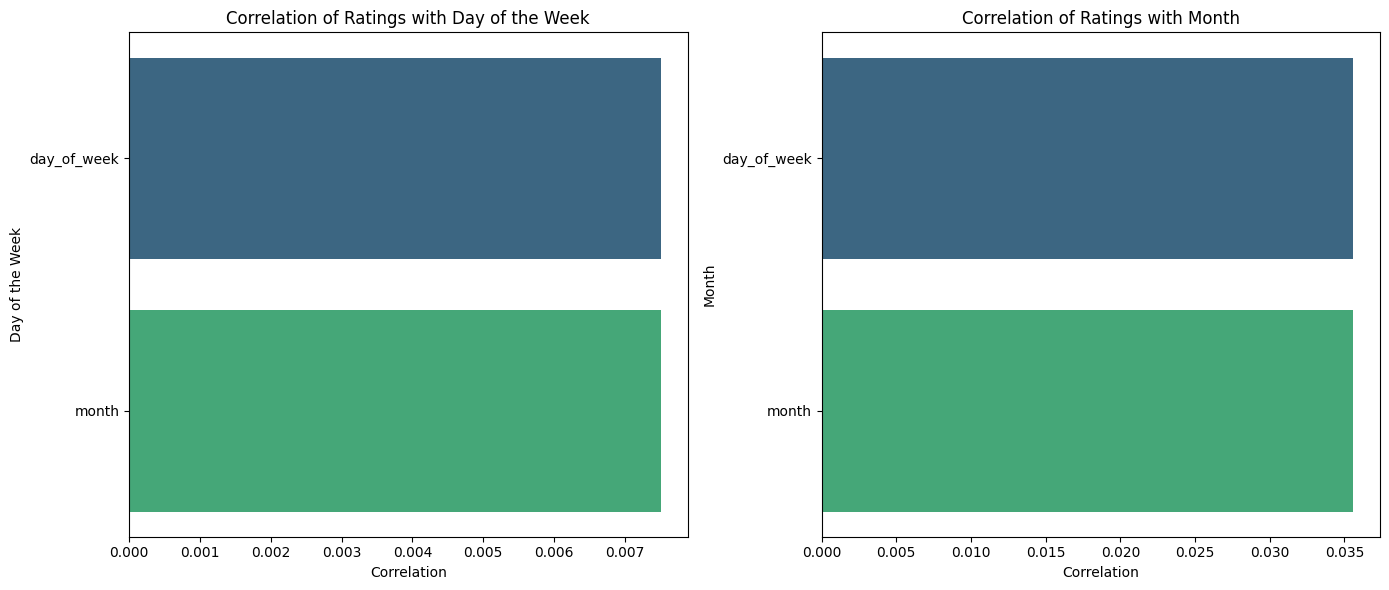

In [ ]:


# Assuming 'combined_df' is your DataFrame
# Split the 'genres' column by '|'
genres_split = combined_df['genres'].str.split('|', expand=True)

# Melt the DataFrame to turn the split genres into a single column
genres_melted = genres_split.melt(value_name='genre').dropna()

# Drop duplicates to get unique genres
unique_genres = genres_melted['genre'].unique()

# Count unique genres
num_unique_genres = len(unique_genres)

# Display the unique genres and their count
print(f"Unique genres count: {num_unique_genres}")
print("Unique genres:")
print(unique_genres)

Unique genres count: 20
Unique genres:
['Adventure' 'Comedy' 'Action' 'Mystery' 'Crime' 'Thriller' 'Drama'
 'Animation' 'Children' 'Horror' 'Documentary' 'Sci-Fi' 'Fantasy'
 'Film-Noir' 'Western' 'Musical' 'Romance' '(no genres listed)' 'War'
 'IMAX']


In [ ]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
 6   year       100836 non-null  int32         
 7   month      100836 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(2)
memory usage: 5.4+ MB
None


In [ ]:
print(combined_df.describe())

              userId        movieId         rating  \
count  100836.000000  100836.000000  100836.000000   
mean      326.127564   19435.295718       3.501557   
min         1.000000       1.000000       0.500000   
25%       177.000000    1199.000000       3.000000   
50%       325.000000    2991.000000       3.500000   
75%       477.000000    8122.000000       4.000000   
max       610.000000  193609.000000       5.000000   
std       182.618491   35530.987199       1.042529   

                           timestamp           year          month  
count                         100836  100836.000000  100836.000000  
mean   2008-03-19 17:01:27.368469504    2007.722936       6.413811  
min              1996-03-29 18:36:55    1996.000000       1.000000  
25%              2002-04-18 09:57:46    2002.000000       4.000000  
50%              2007-08-02 20:31:02    2007.000000       6.000000  
75%       2015-07-04 07:15:44.500000    2015.000000       9.000000  
max              2018-09-24 14

In [ ]:
print(combined_df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
year         0
month        0
dtype: int64


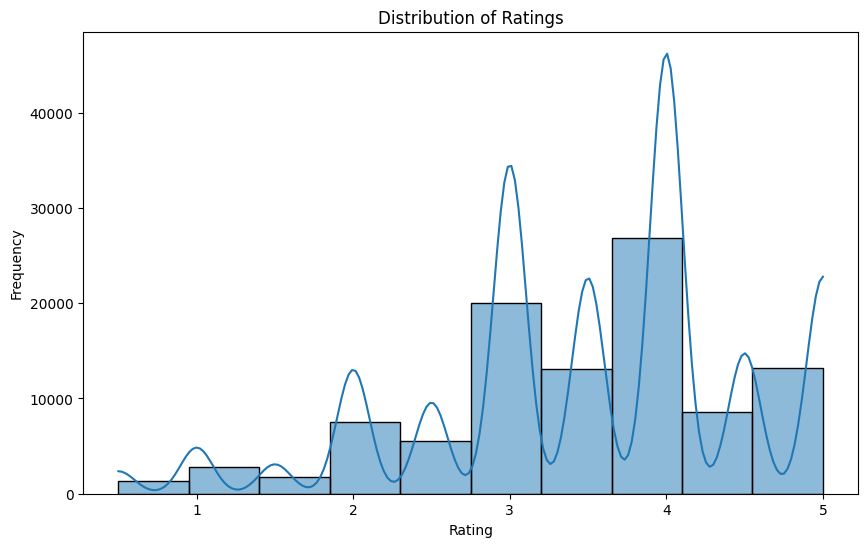

In [ ]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

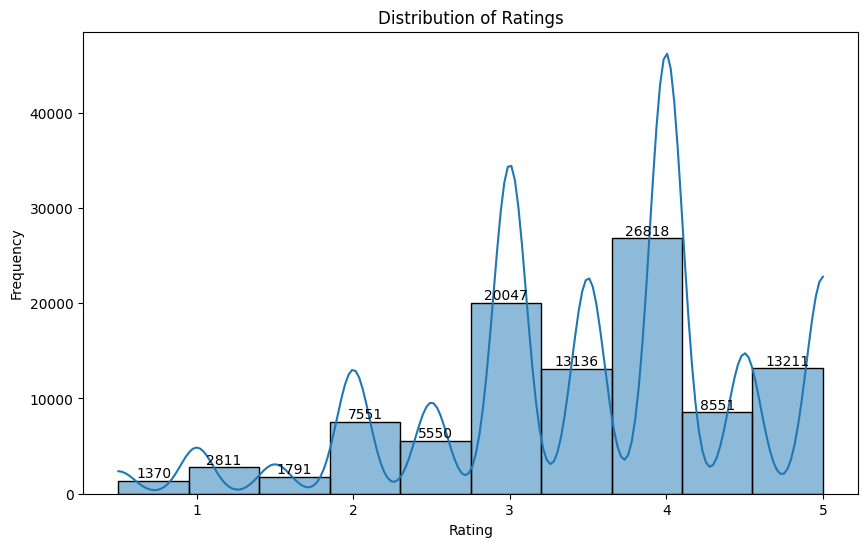

In [ ]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['rating'], bins=10, kde=True)

# Adding counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count of each rating value
rating_counts = combined_df['rating'].value_counts().sort_index()

# Display the counts
print(rating_counts)

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


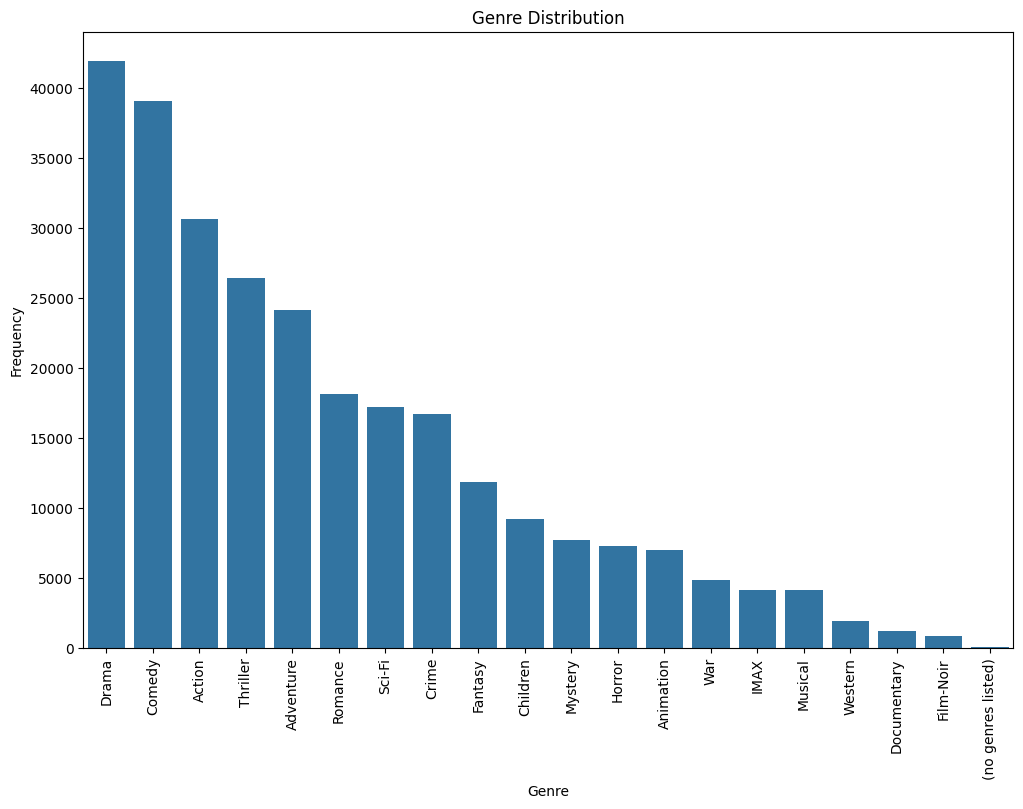

In [ ]:
# Genre counts
genre_counts = combined_df['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

# Plot genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Assuming combined_df is your DataFrame

# Split the 'genres' column into separate genre columns
genre_dummies = combined_df['genres'].str.get_dummies(sep='|')

# Sum the occurrences of each genre
genre_counts = genre_dummies.sum().sort_values(ascending=False)

# Display the genre counts
print(genre_counts)

Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
dtype: int64


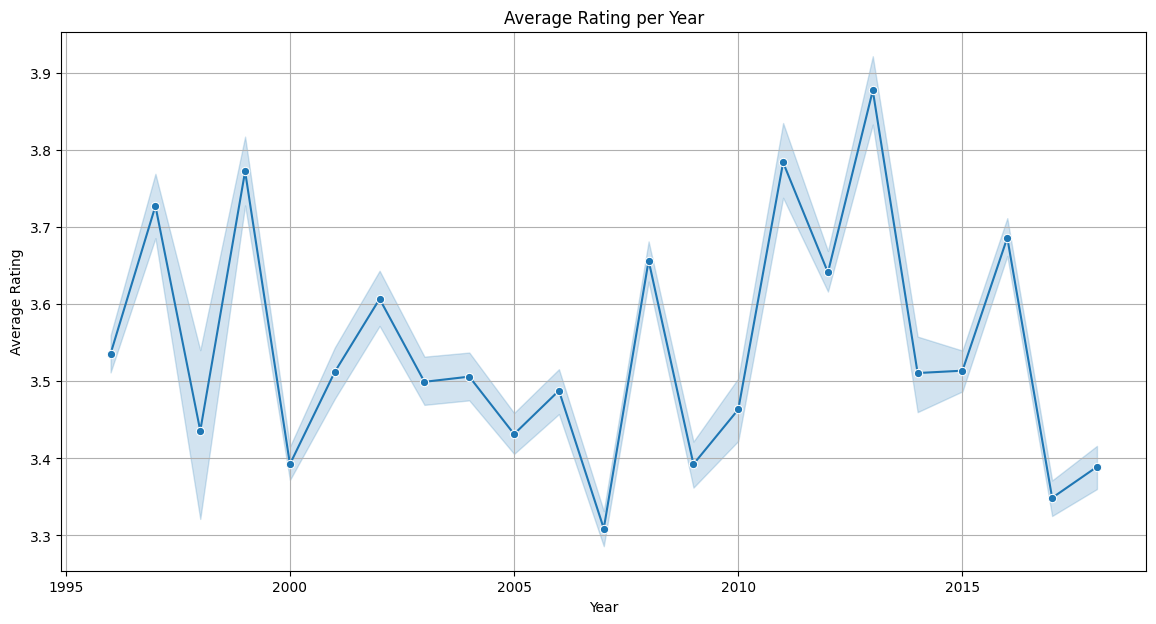

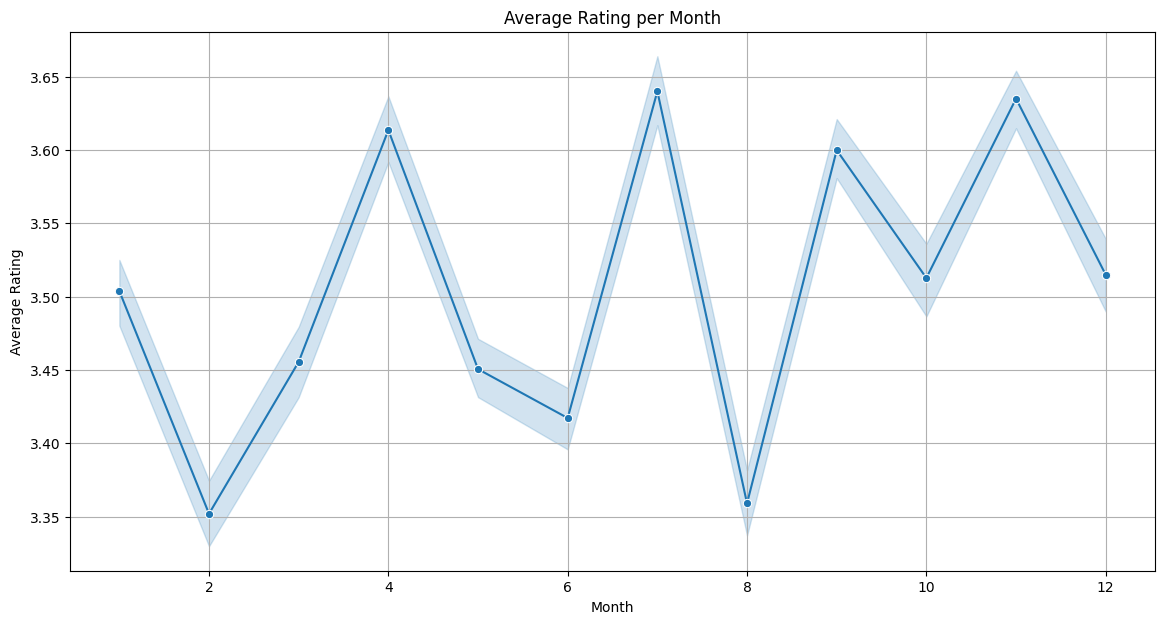

In [ ]:
# Plot average rating per year
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='year', y='rating', estimator='mean', marker='o')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Plot average rating per month
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='month', y='rating', estimator='mean', marker='o')
plt.title('Average Rating per Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


In [ ]:
# Count the number of ratings per year
ratings_per_year = combined_df['year'].value_counts().sort_index()

# Display the counts
print("Ratings per Year:")
print(ratings_per_year)


Ratings per Year:
year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3279
2005     5813
2006     4059
2007     7114
2008     4351
2009     4158
2010     2301
2011     1690
2012     4656
2013     1664
2014     1439
2015     6616
2016     6703
2017     8198
2018     6418
Name: count, dtype: int64


In [ ]:
# Count the number of ratings per month
ratings_per_month = combined_df['month'].value_counts().sort_index()

# Display the counts
print("Ratings per Month:")
print(ratings_per_month)


Ratings per Month:
month
1      8684
2      7635
3      8880
4      7727
5     10883
6      8825
7      6950
8      9074
9      8510
10     7148
11     9676
12     6844
Name: count, dtype: int64


<ipython-input-33-5c86dcba7d25>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Genre', data=correlation_df, palette='viridis')


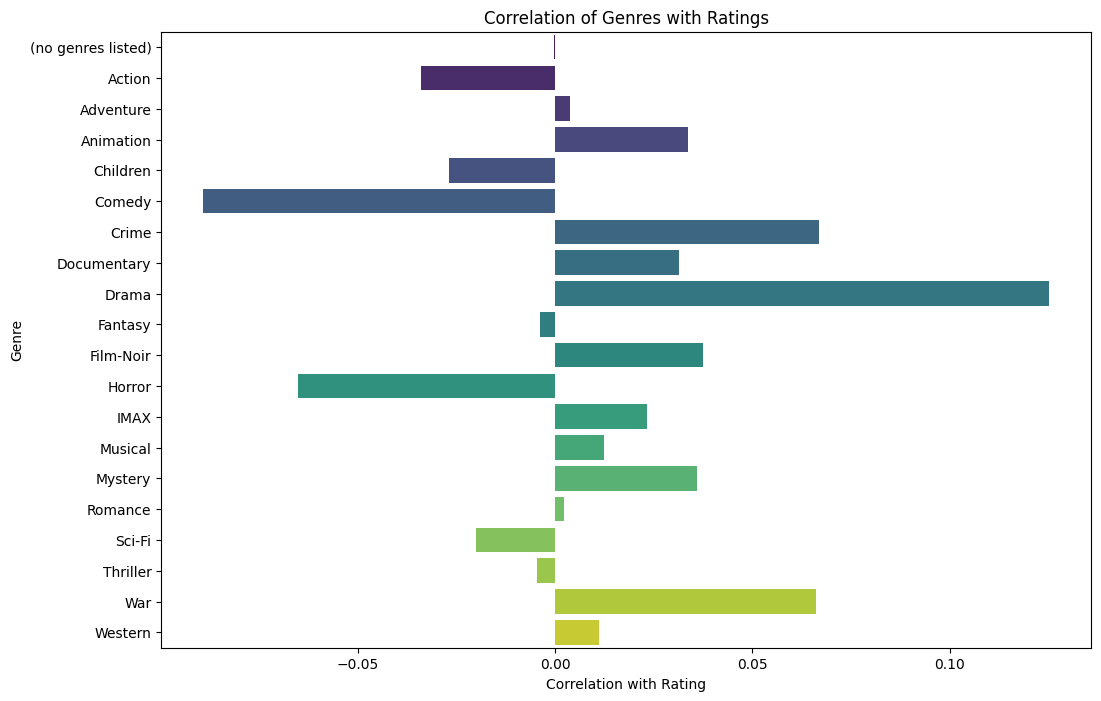

In [ ]:

# Example DataFrame (assuming this is your actual DataFrame)
# combined_df = pd.read_csv('your_combined_df.csv')

# Step 1: Split genres into separate binary columns
genres_df = combined_df['genres'].str.get_dummies(sep='|')

# Step 2: Concatenate the genres with the original DataFrame
combined_df_with_genres = pd.concat([combined_df[['rating']], genres_df], axis=1)

# Step 3: Compute correlations between genres and ratings
correlations = combined_df_with_genres.corr()['rating'].drop('rating')

# Step 4: Prepare the data for visualization
correlation_df = correlations.reset_index()
correlation_df.columns = ['Genre', 'Correlation']

# Step 5: Plot the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Genre', data=correlation_df, palette='viridis')
plt.title('Correlation of Genres with Ratings')
plt.xlabel('Correlation with Rating')
plt.ylabel('Genre')
plt.show()


In [ ]:
import pandas as pd

# Step 1: Split genres into separate binary columns
genres_df = combined_df['genres'].str.get_dummies(sep='|')

# Step 2: Concatenate the genres with the original DataFrame
combined_df_with_genres = pd.concat([combined_df[['rating']], genres_df], axis=1)

# Step 3: Compute correlations between genres and ratings
correlations = combined_df_with_genres.corr()['rating'].drop('rating')

# Step 4: Prepare the data for display
correlation_df = correlations.reset_index()
correlation_df.columns = ['Genre', 'Correlation']

# Display the data
print(correlation_df)


                 Genre  Correlation
0   (no genres listed)    -0.000253
1               Action    -0.033946
2            Adventure     0.003797
3            Animation     0.033603
4             Children    -0.026941
5               Comedy    -0.089101
6                Crime     0.066935
7          Documentary     0.031432
8                Drama     0.125131
9              Fantasy    -0.003692
10           Film-Noir     0.037454
11              Horror    -0.065170
12                IMAX     0.023192
13             Musical     0.012326
14             Mystery     0.036038
15             Romance     0.002224
16              Sci-Fi    -0.019968
17            Thriller    -0.004491
18                 War     0.066202
19             Western     0.011038
